### 📌 1. Setup & Connect to MySQL

In [9]:
import mysql.connector
import matplotlib.pyplot as plt

# Connect to MySQL
conn = mysql.connector.connect(
    host="localhost",           
    user="root",   
    password="Siddhant@0511",   
    database="day7"    
)

cursor = conn.cursor()
print("✅ Connected to MySQL!")


✅ Connected to MySQL!


### 📌 2. Sales by Product Line

🛒 Sales by Product Line:
Health and beauty - Quantity: 854, Revenue: $49193.74
Electronic accessories - Quantity: 971, Revenue: $54337.53
Home and lifestyle - Quantity: 911, Revenue: $53861.91
Sports and travel - Quantity: 920, Revenue: $55122.83
Food and beverages - Quantity: 952, Revenue: $56144.84
Fashion accessories - Quantity: 902, Revenue: $54305.89


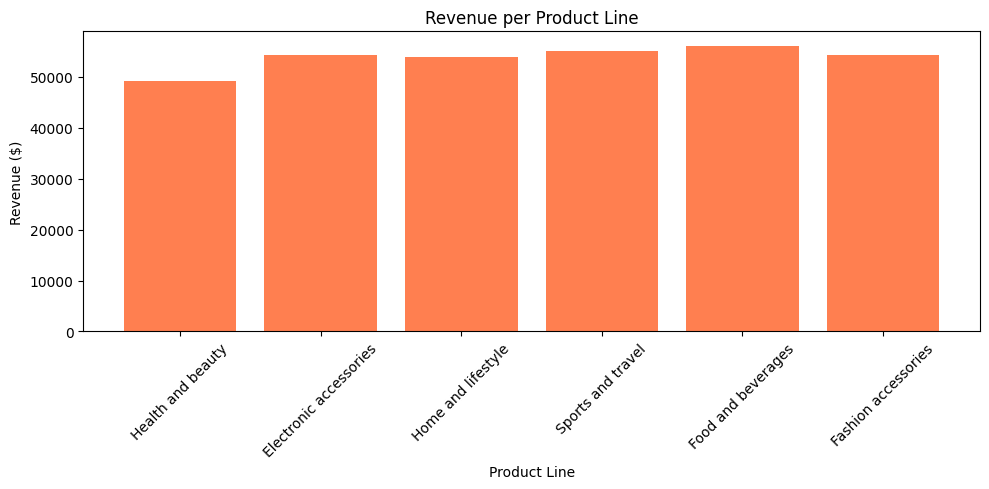

In [10]:
# Query: total quantity and revenue per product line
cursor.execute('''
    SELECT 
        `Product line`, 
        SUM(Quantity) AS total_quantity, 
        SUM(Total) AS total_revenue
    FROM sales
    GROUP BY `Product line`
''')
product_data = cursor.fetchall()

# Display results
print("🛒 Sales by Product Line:")
for row in product_data:
    print(f"{row[0]} - Quantity: {row[1]}, Revenue: ${row[2]:.2f}")

# Bar chart
product_names = [row[0] for row in product_data]
quantities = [row[1] for row in product_data]
revenues = [row[2] for row in product_data]

plt.figure(figsize=(10,5))
plt.bar(product_names, revenues, color='coral')
plt.title('Revenue per Product Line')
plt.xlabel('Product Line')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



### 📌 3. Avg Spending by Customer Type

👥 Average Spending by Customer Type:
Member - Avg Spending: $327.79
Normal - Avg Spending: $318.12


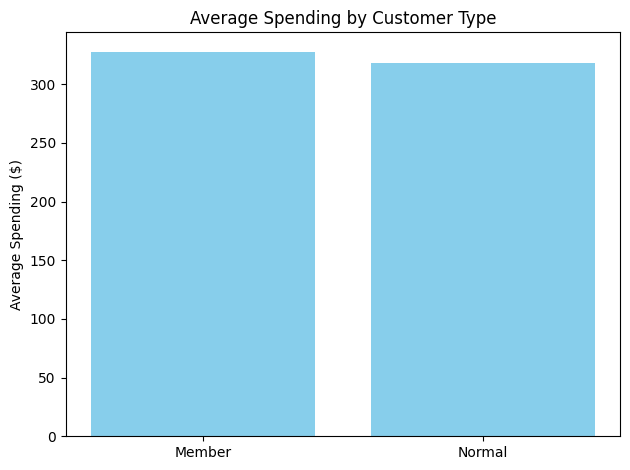

In [11]:
# Query: avg spending by customer type
cursor.execute('''
    SELECT 
        `Customer type`, 
        ROUND(AVG(Total), 2) AS avg_spending
    FROM sales
    GROUP BY `Customer type`
''')
customer_data = cursor.fetchall()

print("👥 Average Spending by Customer Type:")
for row in customer_data:
    print(f"{row[0]} - Avg Spending: ${row[1]}")

# Bar chart
customer_types = [row[0] for row in customer_data]
avg_spendings = [row[1] for row in customer_data]

plt.bar(customer_types, avg_spendings, color='skyblue')
plt.title('Average Spending by Customer Type')
plt.ylabel('Average Spending ($)')
plt.tight_layout()
plt.show()


### 📌 4. Total Sales by Payment Method

💳 Total Sales by Payment Method:
Ewallet - Total Sales: $109993.11
Cash - Total Sales: $112206.57
Credit card - Total Sales: $100767.07


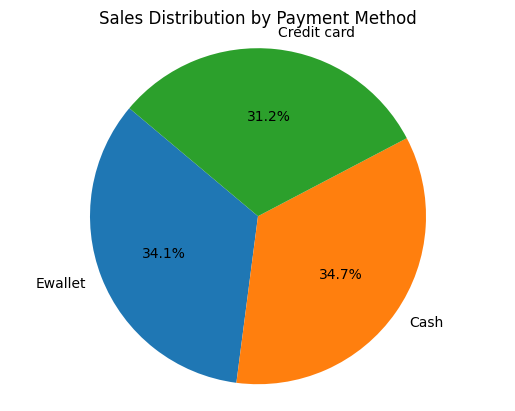

In [12]:
# Query: total sales by payment method
cursor.execute('''
    SELECT 
        Payment, 
        ROUND(SUM(Total), 2) AS total_sales
    FROM sales
    GROUP BY Payment
''')
payment_data = cursor.fetchall()

print("💳 Total Sales by Payment Method:")
for row in payment_data:
    print(f"{row[0]} - Total Sales: ${row[1]}")

# Pie chart
payment_labels = [row[0] for row in payment_data]
payment_values = [row[1] for row in payment_data]

plt.pie(payment_values, labels=payment_labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Sales Distribution by Payment Method')
plt.show()


### 📌 5. Top Cities by Gross Income

🌆 Top Cities by Gross Income:
Naypyitaw - Gross Income: $5265.18
Yangon - Gross Income: $5057.16
Mandalay - Gross Income: $5057.03


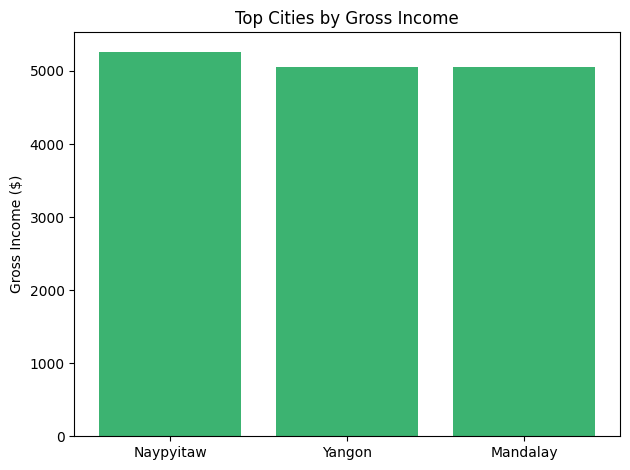

In [13]:
# Query: top cities by gross income
cursor.execute('''
    SELECT 
        City, 
        ROUND(SUM(`gross income`), 2) AS total_gross_income
    FROM sales
    GROUP BY City
    ORDER BY total_gross_income DESC
    LIMIT 5
''')
city_data = cursor.fetchall()

print("🌆 Top Cities by Gross Income:")
for row in city_data:
    print(f"{row[0]} - Gross Income: ${row[1]}")

# Bar chart
cities = [row[0] for row in city_data]
gross_incomes = [row[1] for row in city_data]

plt.bar(cities, gross_incomes, color='mediumseagreen')
plt.title('Top Cities by Gross Income')
plt.ylabel('Gross Income ($)')
plt.tight_layout()
plt.show()


### 📌 6. Close Connection 

In [14]:
cursor.close()
conn.close()
print("🔌 MySQL connection closed.")


🔌 MySQL connection closed.
